In [2]:
import napari
%gui qt5

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from brainlit.utils.ngl_pipeline import NeuroglancerSession
from brainlit.viz.swc import *
from brainlit.viz.visualize import *
import numpy as np
from skimage import io

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]


In [4]:
# Create a neuroglancersession
ngl_sess = NeuroglancerSession(mip = 1)
img, bbbox, vox = ngl_sess.pull_chunk(2, 300, 1, 1, 1)

Downloading:   0%|          | 0/3 [00:00<?, ?it/s]


In [5]:
plot_image_2d(img[:,100,:])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14d5dbd10>)

In [6]:
s3_path = "s3://mouse-light-viz/precomputed_volumes/brain1_segments"
seg_id = 2
mip = 1
df = read_s3(s3_path, seg_id, mip)
df.head()

G = df_to_graph(df)
print('Number of nodes:', len(G.nodes))
print('Number of edges:', len(G.edges))
print('\n')
print('Sample 1 coordinates (x,y,z)')
print(G.nodes[1]['x'],G.nodes[1]['y'],G.nodes[1]['z'])

bbox = bbbox.to_list()
box = (bbox[:3], bbox[3:])
G_sub = get_sub_neuron(G, box)
paths_sub = graph_to_paths(G_sub)
viewer = napari.Viewer(ndisplay=3)
viewer.add_shapes(data=paths_sub, shape_type='path', edge_color='blue', name='Skeleton 2')

paths = graph_to_paths(G=G)
print(f"The graph was decomposed into {len(paths)} paths")

viewer = napari.Viewer(ndisplay=3)
viewer.add_shapes(data=paths, shape_type='path', edge_color='white', name='Skeleton 2')

Downloading: 100%|██████████| 1/1 [00:00<00:00, 26.87it/s]


Number of nodes: 1650
Number of edges: 1649


Sample 1 coordinates (x,y,z)
4713 4470 3857
The graph was decomposed into 179 paths


<Shapes layer 'Skeleton 2' at 0x165109f50>

In [7]:
def change_x_dimension(x):
    fig, axes = plot_image_2d(img[x,:,:])
    axes.set_title('First Dimension')

def change_y_dimension(y):
    fig, axes = plot_image_2d(img[:,y,:])
    axes.set_title('Second Dimension')
    
def change_z_dimension(z):
    fig, axes = plot_image_2d(img[:,:,z])
    axes.set_title('Third Dimension')
    
s1=interact(change_x_dimension, x=widgets.IntSlider(min=0,max=img.shape[0]-1,step=1,value=10))
s2=interact(change_y_dimension, y=widgets.IntSlider(min=0,max=img.shape[1]-1,step=1,value=10))
s3=interact(change_z_dimension, z=widgets.IntSlider(min=0,max=img.shape[2]-1,step=1,value=10))


interactive(children=(IntSlider(value=10, description='x', max=197), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=10, description='y', max=149), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=10, description='z', max=155), Output()), _dom_classes=('widget-interact…

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1677d9650>)

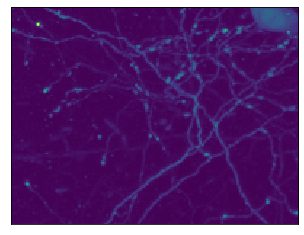

In [8]:
plot_image_mip(img)

In [7]:
plot_image_hist(img)